In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_data_csv = "./data/mouse_drug_data.csv"
clinical_data_csv = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_data_csv)
clin_data = pd.read_csv(clinical_data_csv)

# Combine the data into a single dataset
data = pd.merge(mouse_data, clin_data)

# Display the data table for preview
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = data.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame( tumor_mean )[['Tumor Volume (mm3)']]

# Preview DataFrame
tumor_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = data.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame( tumor_sem )[['Tumor Volume (mm3)']]

# Preview DataFrame
tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [22]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df = data.pivot_table( index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [23]:
# Collect data to use in Plot
tumor_df = tumor_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
times = np.arange(0,50,5)
errors = tumor_df.sem().values

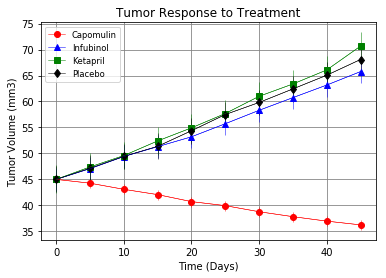

In [9]:
# Configure Plot details
fig,ax = plt.subplots()
plt.errorbar(times, tumor_df['Capomulin'], yerr=errors[0], color="red", linewidth=0.5)
plt.errorbar(times, tumor_df['Infubinol'], yerr=errors[1], color="blue", linewidth=0.5)
plt.errorbar(times, tumor_df['Ketapril'], yerr=errors[2], color="green", linewidth=0.5)
plt.errorbar(times, tumor_df['Placebo'], yerr=errors[3], color="black", linewidth=0.5)

# For each drug
plt.plot(times, tumor_df['Capomulin'], linewidth=0.5, marker="o", color="red")
plt.plot(times, tumor_df['Infubinol'], linewidth=0.5, marker="^", color="blue")
plt.plot(times, tumor_df['Ketapril'], linewidth=0.5, marker="s", color="green")
plt.plot(times, tumor_df['Placebo'], linewidth=0.5, marker="d", color="black")

# Overall
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.legend( loc="best", fontsize="small", fancybox=True, labels=tumor_df.columns )
plt.grid(color='gray', linestyle='solid')

# Save the Figure
plt.savefig( fname = "tumor_change.png", bbox = 'tight')

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
site_mean = data.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
site_mean_df = pd.DataFrame( site_mean )[['Metastatic Sites']]

# Preview DataFrame
site_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
site_sem = data.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
site_sem_df = pd.DataFrame( site_sem )[['Metastatic Sites']]

# Preview DataFrame
site_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
df = data.pivot_table( index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
# Collect data to use in Plot
df = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
times = np.arange(0,50,5)
errors = df.sem().values

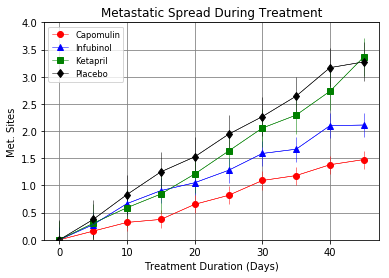

In [14]:
# Configure Plot details
fig,ax = plt.subplots()
plt.errorbar(times, df['Capomulin'], yerr=errors[0], color="red", linewidth=0.5)
plt.errorbar(times, df['Infubinol'], yerr=errors[1], color="blue", linewidth=0.5)
plt.errorbar(times, df['Ketapril'], yerr=errors[2], color="green", linewidth=0.5)
plt.errorbar(times, df['Placebo'], yerr=errors[3], color="black", linewidth=0.5)

# For each drug
plt.plot(times, df['Capomulin'], linewidth=0.5, marker="o", color="red")
plt.plot(times, df['Infubinol'], linewidth=0.5, marker="^", color="blue")
plt.plot(times, df['Ketapril'], linewidth=0.5, marker="s", color="green")
plt.plot(times, df['Placebo'], linewidth=0.5, marker="d", color="black")

# Overall
ax.set_ylim(bottom=0.0, top=4.0)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.legend( loc="best", fontsize="small", fancybox=True, labels=df.columns )
plt.grid(color='gray', linestyle='solid')

# Save the Figure
plt.savefig( fname = "met_spread.png", bbox = 'tight')

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = data.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame
mice_count_df = pd.DataFrame( mice_count )[['Mouse ID']]

# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [27]:
# Minor Data Munging to Re-Format the Data Frames
df = mice_count_df.pivot_table( index='Timepoint', columns='Drug', values='Mouse ID')

# Preview that Reformatting worked
df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
# Collect data to use in Plot
mice_df = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
times = np.arange(0,50,5)
errors = mice_df.sem().values

In [18]:
# Calculate Survival Rates for each drug
cap_perc = [df['Capomulin'][i*5] / .25 for i in range(0,10)]
infub_perc = [df['Infubinol'][i*5] / .25 for i in range(0,10)]
keta_perc = [df['Ketapril'][i*5] / .25 for i in range(0,10)]
placebo_perc = [df['Placebo'][i*5] / .25 for i in range(0,10)]
ceft_perc = [df['Ceftamin'][i*5] / .25 for i in range(0,10)]
naft_perc = [df['Naftisol'][i*5] / .25 for i in range(0,10)]
prop_perc = [df['Propriva'][i*5] / .25 for i in range(0,10)]
rami_perc = [df['Ramicane'][i*5] / .25 for i in range(0,10)]
stela_perc = [df['Stelasyn'][i*5] / .25 for i in range(0,10)]
zoni_perc = [df['Zoniferol'][i*5] / .25 for i in range(0,10)]

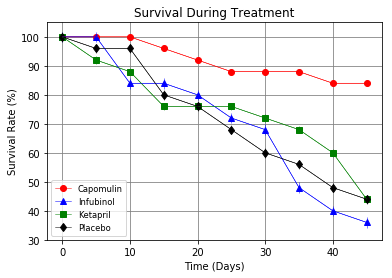

In [19]:
# Configure Plot details
fig,ax = plt.subplots()
plt.errorbar(times, cap_perc, yerr=errors[0], color="red", linewidth=0.5)
plt.errorbar(times, infub_perc, yerr=errors[1], color="blue", linewidth=0.5)
plt.errorbar(times, keta_perc, yerr=errors[2], color="green", linewidth=0.5)
plt.errorbar(times, placebo_perc, yerr=errors[3], color="black", linewidth=0.5)

# For each drug
plt.plot(times, cap_perc, linewidth=0.5, marker="o", color="red")
plt.plot(times, infub_perc, linewidth=0.5, marker="^", color="blue")
plt.plot(times, keta_perc, linewidth=0.5, marker="s", color="green")
plt.plot(times, placebo_perc, linewidth=0.5, marker="d", color="black")

# Overall
ax.set_ylim(bottom=30, top=105)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
ax.legend( loc="best", fontsize="small", fancybox=True, labels=mice_df.columns )
plt.grid(color='gray', linestyle='solid')

# Save the Figure
plt.savefig( fname = "surv_rates.png", bbox = 'tight')

## Summary Bar Graph

In [28]:
# Calculate the percent changes in tumor vol for each drug
all_percs = [[df['Capomulin'][i*5] / .45 for i in range(0,10)],
            [df['Ceftamin'][i*5] / .45 for i in range(0,10)],
            [df['Infubinol'][i*5] / .45 for i in range(0,10)],
            [df['Ketapril'][i*5] / .45 for i in range(0,10)],
            [df['Naftisol'][i*5] / .45 for i in range(0,10)],
            [df['Placebo'][i*5] / .45 for i in range(0,10)],
            [df['Propriva'][i*5] / .45 for i in range(0,10)],
            [df['Ramicane'][i*5] / .45 for i in range(0,10)],
            [df['Stelasyn'][i*5] / .45 for i in range(0,10)],
            [df['Zoniferol'][i*5] / .45 for i in range(0,10)]]
# Display the data to confirm
perc_change = [ percList[9]-percList[0] for percList in all_percs]
perc_change

[-8.888888888888893,
 -26.666666666666668,
 -35.55555555555556,
 -31.111111111111114,
 -26.666666666666668,
 -31.111111111111114,
 -42.22222222222222,
 -11.111111111111114,
 -33.333333333333336,
 -24.444444444444446]

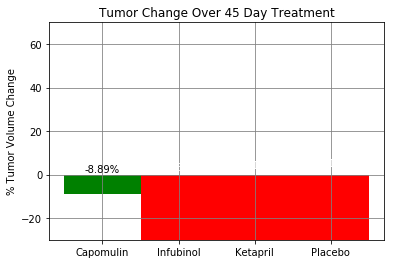

In [29]:
# Compile data for chart
plt.bar(np.arange(1), perc_change[0], width=1, color="green")
plt.bar(np.arange(4), [0, perc_change[2], perc_change[3], perc_change[5]], width=1, color="r")
percs = ["{:.2%}".format(perc_change[0]/100),
         "{:.2%}".format(perc_change[2]/100),
         "{:.2%}".format(perc_change[3]/100),
         "{:.2%}".format(perc_change[5]/100)]

# Label axes
plt.xticks(np.arange(4), tumor_df.columns)
plt.ylim(-30,70)
plt.yticks(np.arange(-20, 80, 20))
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(color='gray', linestyle='solid')

# Label bars
plt.text(0, 1, percs[0], horizontalalignment='center', color='black')
plt.text(1, 2, percs[1], horizontalalignment='center', color='w')
plt.text(2, 3, percs[2], horizontalalignment='center', color='w')
plt.text(3, 4, percs[3], horizontalalignment='center', color='w')
    
# Save the Figure
plt.savefig( fname = "tumor_change.png", bbox = 'tight')